# 09 Pre-Class Assignment: Determinants

### Readings for this topic (Recommended in bold)
 * [Heffron Chapter 4.I-II pg 317-337](http://joshua.smcvt.edu/linearalgebra/book.pdf)
 * [**_Beezer Chapter D pg 340-366_**](http://linear.ups.edu/download/fcla-3.50-tablet.pdf)


### Goals for today's pre-class assignment 


1. [Introduction to Determinants](#Introduction_to_Determinants)
1. [Properties of Determinants](#Properties_of_Determinants)
1. [One interpretation of determinants](#One_Interpretation_of_determinants)
1. [Cramer's Rule](#CramersRule)
1. [Assignment wrap-up](#Assignment_wrap-up)

----

<a name="Introduction_to_Determinants"></a>
## 1. Introduction to Determinants

For a detailed overview of determinants I would recommend reviewing **_Chapter D pg 340-366_** of the Beezer text.  

The determinant is a function that takes a ($n \times n$) square matrix as an input and produces a scalar as an output. Determinants have been studied quite extensively and have many interesting properties.  However, determinants are "computationally expensive" as the size of your matrix ($n$) gets bigger.  This limitation makes them impractical for many real world problems.  

The determinant of a $ 2 \times 2$ matrix can be calculated as follows:

$$ 
det \left(
\left[
\begin{matrix}
    a_{11} & a_{12}  \\
    a_{21} & a_{22}
\end{matrix}
\right] 
\right)
= a_{11}a_{22} - a_{12}a_{21}
$$


&#9989; **<font color=red>QUESTION:</font>** Calculate the determinant of the following matrix by hand:

$$ 
\left[
\begin{matrix}
    3 & -2  \\
    1 & 2
\end{matrix}
\right] 
$$

Put your answer here

Calculating the determinant of a larger matrix is a "recursive" problem which involves combining the determinants of smaller and smaller sub-matrices until you have a $2 \times 2$ matrix which is then calculated using the above formula.  Here is some Pseudocode to calculate a determinant.  To simplify the example the code assumes there is a matrix function ```deleterow``` which will remove the $x$th row from a matrix  (always the first row in this example) and ```deletecol``` will remove the $x$th column from a matrix. When used together (as shown below) they will take an $n \times n$ matrix and turn it into a $ (n-1) \times (n-1)$ matrix.  


```bash
function determinant(A, n)
   det = 0
   if (n == 1)
      det = matrix[1,1]
   else if (n == 2)
      det = matrix[1,1] * matrix[2,2] - matrix[1,2] * matrix[2,1]
   else 
      for x from 1 to n
          submatrix = deleterow(matrix, 1)
          submatrix = deletecol(submatrix, x)
          det = det + (-1)**(x+1) * matrix[1,x] * determinant(submatrix, n-1)
      next x
   endif
   
   return det
```

Notice that the combination of the determinants of the submatrices is not a simple sum.  The combination is adding the submatrices corresponding to the odd columns (1,3,5, etc) and subtracting the submatrices corresponding to the even columns (2,4,6, etc.). This may become clearer if we look at a simple $3 \times 3$ example (Let $|A|$ be a simplified syntax for writing the determinant of $A$):

$$
\begin{align*}
A &= \left[
\begin{matrix}
    a_{11} & a_{12} & a_{13} \\
    a_{21} & a_{22} & a_{23} \\
    a_{31} & a_{32} & a_{33} 
\end{matrix}
\right] \\\\
|A| &=
a_{11} \left|
\begin{matrix}
    \square & \square  & \square  \\
    \square  & a_{22} & a_{23} \\
    \square  & a_{32} & a_{33} 
\end{matrix}
\right|
-
a_{12}\left|
\begin{matrix}
    \square & \square  & \square  \\
    a_{21} & \square & a_{23} \\
    a_{31} & \square & a_{33} 
\end{matrix}
\right|
+
a_{13} \left|
\begin{matrix}
    \square & \square  & \square  \\
    a_{21} & a_{22} & \square \\
    a_{31} & a_{32} & \square
\end{matrix}
\right| \\ \\ 
|A|
&=
a_{11}\left|
\begin{matrix}
    a_{22} & a_{23}  \\
    a_{32} & a_{33}
\end{matrix}
\right|
-
a_{12}\left|
\begin{matrix}
    a_{21} & a_{23}  \\
    a_{31} & a_{33}
\end{matrix}
\right|
+
a_{13}
\left|
\begin{matrix}
    a_{21} & a_{22}  \\
    a_{31} & a_{32}
\end{matrix}
\right| \\ \\ 
|A| &= 
a_{11}(a_{22}a_{33} - a_{23}a_{32})
-
a_{12}(a_{21}a_{33} - a_{23}a_{31})
+
a_{13}(a_{21}a_{32} - a_{22}a_{31})
\end{align*}
$$

&#9989; **<font color=red>QUESTION:</font>** Calculate the determinant of the following matrix by hand:

$$ 
\left[
\begin{matrix}
    1 & 2 & -3  \\
    5 & 0 & 6  \\
    7 & 1 & -4
\end{matrix}
\right] 
$$

Put your answer here

&#9989; **<font color=red>QUESTION:</font>** Use the ```numpy.linalg``` library to calculate the determinant of the following matrix and store the value in a variable called ```det```

$$
\left[
\begin{matrix}
    2 & 0 & 1 & -5  \\
    8 & -1 & 2 & 1  \\
    4 & -3 & -5 & 0 \\
    1 & 4 & 8 & 2
\end{matrix}
\right] 
$$

In [1]:
#Put your answer here
import numpy as np
array = np.matrix([[2,0,1,-5],[8,-1,2,1],[4,-3,-5,0],[1,4,8,2]])
det = np.linalg.det(array)

In [2]:
from answercheck import checkanswer

checkanswer.float(det,'49afb719e0cd46f74578ebf335290f81');


    Trying to convert to a float using ```A = float(A)```.

Testing 230.0
Answer seems to be correct



----

<a name="Properties_of_Determinants"></a>
## 2. Properties of Determinants

The following are some helpful properties when working with determinants.  These properties are often used in proofs and can sometimes be utilized to make faster calculations.

### Row Operations

Let $A$ be an $n \times n$ matrix and $c$ be a nonzero scalar. Let $|A|$ be a simplified syntax for writing the determinant of $A$: 

1. If a matrix $B$ is obtained from $A$ by multiplying a row (or column) by $c$ then $|B| = c|A|$.
2. If a matrix $B$ is obtained from $A$ by interchanging two rows (or columns) then $|B| = -|A|$.
3. if a matrix $B$ is obtained from $A$ by adding a multiple of one row (column) to another row (column), then $|B| = |A|$.



### Singular Matrices

**Definition:** A square matrix $A$ is said to be **singular** if $|A| = 0$. $A$ is **non-singular** if $|A| \neq 0$

Now, let $A$ be an $n \times n$ matrix. $A$ is singular if any of these is true:

1. all the elements of a row (or column) are zero.
2. two rows (or columns) are equal.
3. two rows (or columns) are proportional. i.e. one row (column) is the same as another row (column) multiplied by $c$.


&#9989; **<font color=red>QUESTION:</font>** The following matrix is singular because of certain column or row properties. Give the reason:

$$ 
\left[
\begin{matrix}
    1 & 5 & 5  \\
    0 & -2 & -2  \\
    3 & 1 & 1
\end{matrix}
\right] 
$$

Put your answer here.

&#9989; **<font color=red>QUESTION:</font>** The following matrix is singular because of certain column or row properties. Give the reason:

$$ 
\left[
\begin{matrix}
    1 & 0 & 4  \\
    0 & 1 & 9  \\
    0 & 0 & 0
\end{matrix}
\right] 
$$

It is here becuase row 3 contains all the zeroes and we can have another row with all 0 if we just multiply it by 0.

### Determinants and Matrix Operations

Let $A$ and $B$ be $n\times n$ matrices and $c$ be a non-zero scalar.

1. Determinant of a scalar multiple: $|cA| = c^n|A|$
2. Determinant of a product: $|AB| = |A||B|$
3. Determinant of a transpose: $|A^t| = |A|$
4. Determinant of an inverse: $|A^{-1}| = \frac{1}{|A|}$ (Assuming $A^{-1}$ exists)

&#9989; **<font color=red>QUESTION:</font>**  If $A$ is a $3\times 3$ matrix with $|A| = 3$, use the properties of determinants to compute the following determinant:

$$|2A|$$

24

&#9989; **<font color=red>QUESTION:</font>**  If $A$ is a $3\times 3$ matrix with $|A| = 3$, use the properties of determinants to compute the following determinant:
$$|A^2|$$

9

&#9989; **<font color=red>QUESTION:</font>**  if $A$ and $B$ are $3\times 3$ matrices and $|A| = -3, |B|=2$, compute the following determinant:

$$|AB|$$


-6

&#9989; **<font color=red>QUESTION:</font>**  if $A$ and $B$ are $3\times 3$ matrices and $|A| = -3, |B|=2$, compute the following determinant:

$$|2AB^{-1}|$$

-6

### Triangular matrices

**Definition:** An **upper triangular matrix** has nonzero elements which lie on or above the main diagonal and zero elements below the main diagonal. For example:


$$ A = 
\left[
\begin{matrix}
    2 & -1 & 9 & 4  \\
    0 & 3 & 0 & 6 \\
    0 & 0 & -5 & 3 \\
    0 & 0 & 0 & 1
\end{matrix}
\right] 
$$

The determinant of an *upper triangular matrix* $A$ is the product of the diagonal elements of the matrix $A$.  

Also, since the Determinant is the same for a matrix and its transpose (i.e.  $|A^t| = |A|$, see definition above) the determinant of a *lower triangular matrix* is also the product of the diagonal elements. 

&#9989; **<font color=red>QUESTION:</font>**   What is the determinant of matrix $A$?

In [3]:
A = np.matrix([[2,-1,9,4],[0,3,0,6],[0,0,-5,3],[0,0,0,1]])
x = np.linalg.det(A)
print(x)
print(2*3*-5*1)

-29.99999999999999
-30


### Using Properties of determinants:
Here is a great video showing how you can use the properties of determinants:

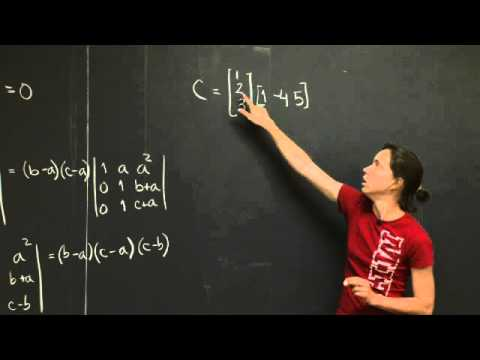

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("aKX5_DucNq8",width=640,height=360, cc_load_policy=True)

&#9989; **<font color=red>QUESTION (A challenging one):</font>**   Using the pattern established in the video can you calculate the determinate of the following matrix?

$$ 
\left[
\begin{matrix}
    1 & a & a^2 & a^3 \\
    1 & b & b^2 & b^3 \\
    1 & c & c^2 & c^3 \\
    1 & d & d^2 & d^3 
\end{matrix}
\right] 
$$


0

----

<a name="One_Interpretation_of_determinants"></a>
## 3. One interpretation of determinants

The following is an application of determinants. Watch this!

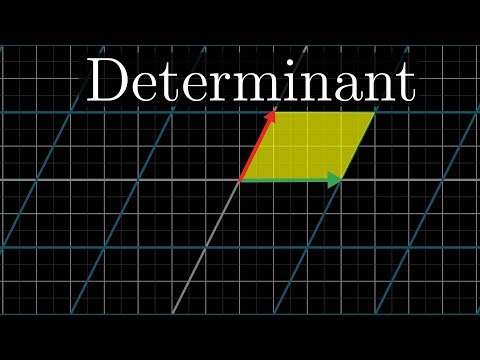

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("Ip3X9LOh2dk",width=640,height=360, cc_load_policy=True)

For fun, we will recreate some of the video's visualizations in Python. 
It was a little tricky to get the aspect ratios correct but here is some code I managed to get it work. 

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np
import sympy as sym

In [7]:
# Lets define somme points that form a Unit Cube
points = np.array([[0, 0, 0],
                  [1, 0, 0 ],
                  [1, 1, 0],
                  [0, 1, 0],
                  [0, 0, 1],
                  [1, 0, 1 ],
                  [1, 1, 1],
                  [0, 1, 1]])

points = np.matrix(points)

In [8]:
#Here is some code to build cube from https://stackoverflow.com/questions/44881885/python-draw-3d-cube

def plot3dcube(Z):
    
    if type(Z) == np.matrix:
        Z = np.asarray(Z)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    r = [-1,1]

    X, Y = np.meshgrid(r, r)
    # plot vertices
    ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])

    # list of sides' polygons of figure
    verts = [[Z[0],Z[1],Z[2],Z[3]],
     [Z[4],Z[5],Z[6],Z[7]], 
     [Z[0],Z[1],Z[5],Z[4]], 
     [Z[2],Z[3],Z[7],Z[6]], 
     [Z[1],Z[2],Z[6],Z[5]],
     [Z[4],Z[7],Z[3],Z[0]], 
     [Z[2],Z[3],Z[7],Z[6]]]

    #alpha transparency was't working found fix here: 
    # https://stackoverflow.com/questions/23403293/3d-surface-not-transparent-inspite-of-setting-alpha
    # plot sides
    ax.add_collection3d(Poly3DCollection(verts, 
     facecolors=(0,0,1,0.25), linewidths=1, edgecolors='r'))
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ## Weird trick to get the axpect ratio to work.
    ## From https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
    mx = np.amax(Z, axis=0)
    mn = np.amin(Z, axis=0)
    max_range = mx-mn

    # Create cubic bounding box to simulate equal aspect ratio
    Xb = 0.5*max_range.max()*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(max_range[0])
    Yb = 0.5*max_range.max()*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(max_range[1])
    Zb = 0.5*max_range.max()*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(max_range[2])
    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')

    plt.show()

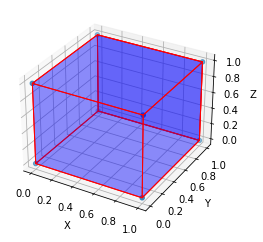

In [9]:
plot3dcube(points)

**<font color='red'>QUESTION:</font>** The following the $3\times 3$ matrix was shown in the video (around 6'50''). Apply this matrix to the unit cube and use the ```plot3dcube``` to show the resulting transformed points. 



IndexError: index 6 is out of bounds for axis 0 with size 6

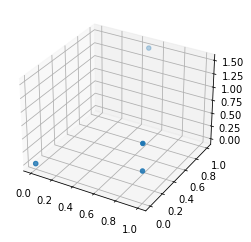

In [10]:
T = np.matrix([[1 , 0 ,  0.5],
               [0.5 ,1 ,1.5],
               [1 , 0 ,  1],[0,0,0],[0,0,0],[0,0,0]])

#Put the answer to the above question here. 
plot3dcube(T)

&#9989; **<font color='red'>QUESTION:</font>** The determinant represents how the area changes when applying a $2 \times 2$ transform.  What does the determinant represent for a $3 \times 3$ transform?

Put your answer here

----

<a name="CramersRule"></a>
## 4. Cramer's Rule

&#9989; **<font color='red'>DO THIS:</font>** Watch the following video and come to class ready to discuss Cramer's Rule:

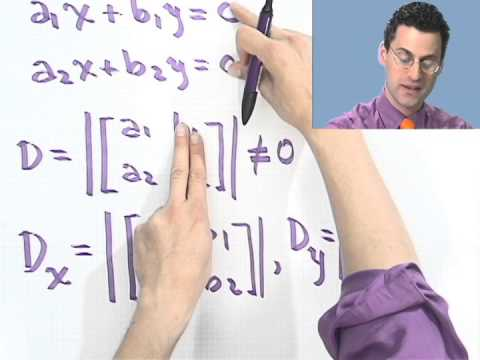

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo("BW6897HIOMA",width=640,height=360, cc_load_policy=True)

----
Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.